<a href="https://colab.research.google.com/github/avichbe/python-amusement/blob/master/home_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests as req
import pandas as pd
import json
import matplotlib.pyplot as plt
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime


# Q1 - loading the json file from the given URL, need some re-arengemte before import it to DF.
url = "https://www.quandl.com/api/v3/datasets/FSE/BDT_X"
data = req.get(url).json()
colunms = data['dataset']["column_names"]
df = pd.DataFrame.from_dict(data['dataset']['data'])
df.columns = colunms

df = df[['Date', 'Close']] #return DF with the intersting values
df['Date'] = pd.to_datetime(df['Date']) #convert the string to dateTime

,Date,Close
0,2020-12-01,38.00
1,2020-11-30,38.00
2,2020-11-27,36.50
3,2020-11-26,35.70
4,2020-11-25,38.75
5,2020-11-24,37.00
6,2020-11-23,35.00
7,2020-11-20,34.15
8,2020-11-19,33.85
9,2020-11-18,35.25


**Q2 SMA for 7,30,90 Days**

In [ ]:
#assumption - Close price is the wanted price when SMA calculated
#2. calculate SMA
df = df.iloc[::-1]
# I chosoe to use rolling windows- to create moving avg on the plot
nine_sma = df['Close'].rolling(window=90).mean()
thirty_sma = df['Close'].rolling(window=30).mean()
seven_sma = df['Close'].rolling(window=7).mean()

**Q3 Monthly Avg**

In [ ]:
#3. monthly avg
#I create date and resample it to a month in the date 
month_mean = df.resample('M', on='Date').mean()
month_mean = month_mean['Close']

**Q 4+5**

In [ ]:
# 4 + 5 censecutive up and down
#created new column call it change - represnt the difference between rows
df['Change'] = pd.DataFrame(df['Close']).diff()
# after that I return to the moving window approach with apply - create bool column if 4/5 days consecutive up/down
df['Con_up'] = df['Close'].rolling(5).apply(lambda x: np.all(np.diff(x) > 0)).astype('boolean')
df['Con_down'] = df['Close'].rolling(4).apply(lambda x: np.all(np.diff(x) < 0)).astype('boolean')
df['Con_up'] = df['Con_up'].shift()
#drop the first values cause they're null
con_df= df.dropna(subset=['Con_up'])
#create 2 DF that contain all up/down dots
up = pd.DataFrame(df[df['Con_up'] == True])
down = pd.DataFrame(df[df['Con_down'] == True])

df.tail(30)



**Plot all data**

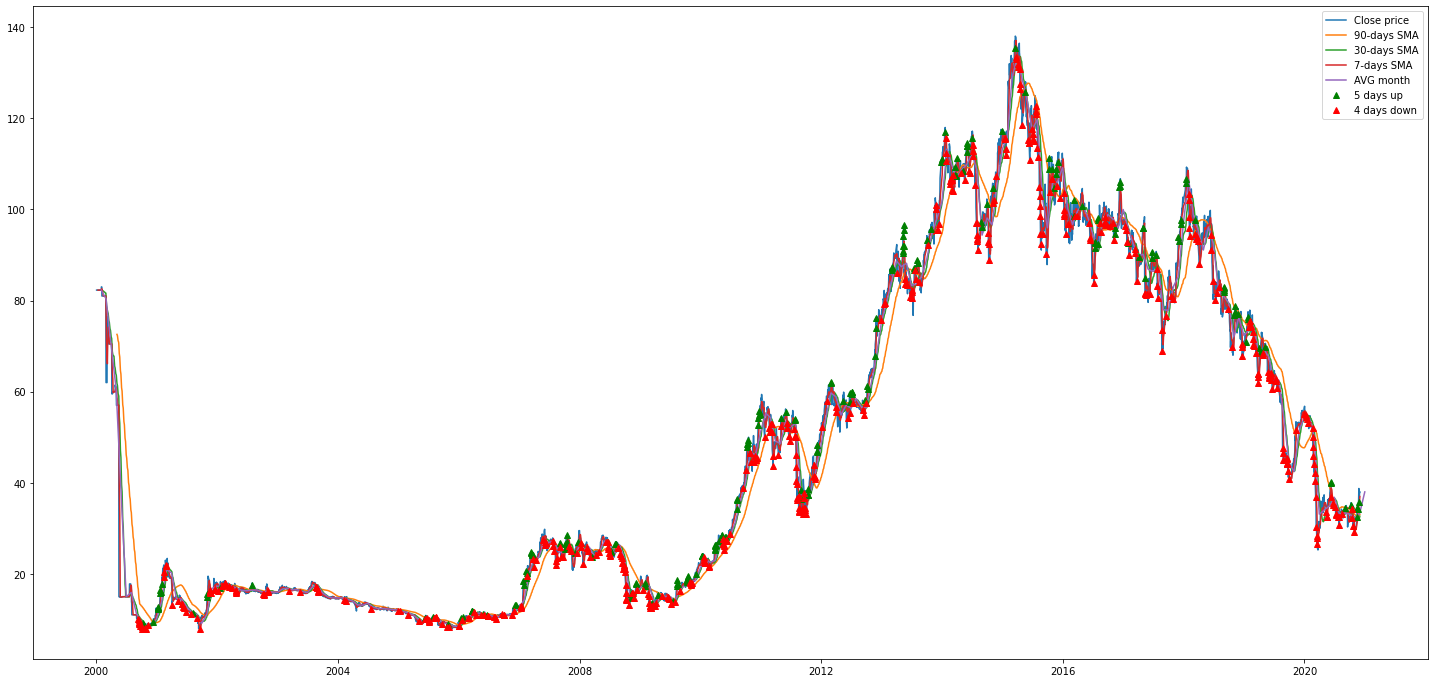

In [ ]:
#using subplot to plot all things on the plot
fig, ax = plt.subplots(figsize=(25,12))
ax.plot(df['Date'], df['Close'], label = 'Close price')
ax.plot(df['Date'], nine_sma, label = '90-days SMA')
ax.plot(df['Date'], thirty_sma, label = '30-days SMA')
ax.plot(df['Date'], seven_sma, label = '7-days SMA')
ax.plot( month_mean, label = "AVG month")
ax.plot(up['Date'],up['Close'], 'g^',label = "5 days up")
ax.plot(down['Date'],down['Close'], 'r^',label = "4 days down")

ax.legend(loc='best')

plt.show()

**Q6 Linear Regression -7,30,90 Days**
After looking on the price/date plot, we can notice that in the last 7 and 30 days terms the stock price increase, so I would anticipate that the slope will be positive, for the 90 days, I anticipated that the slope will be 0 cause the stock price goes up and down. 

[]

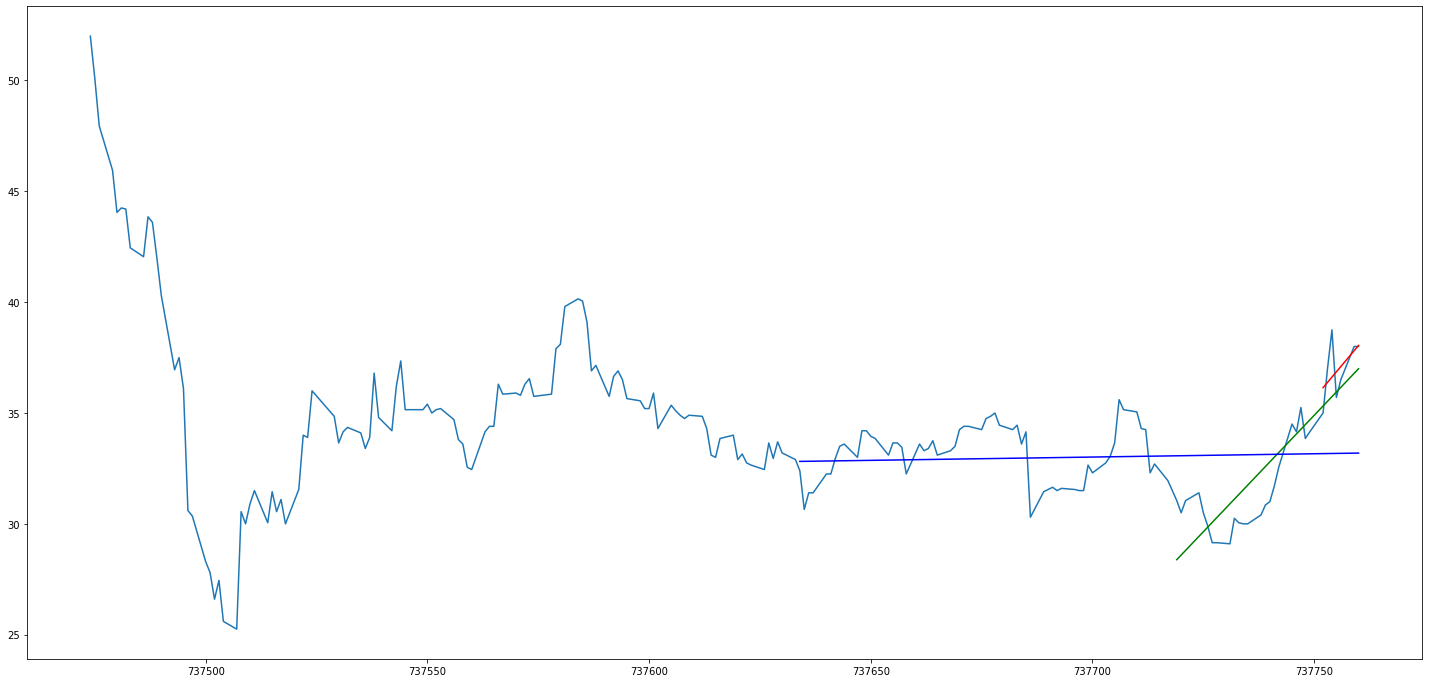

In [ ]:
#6 - for conveniency I use only the data of the 200 last records
df = df.head(200)
# because the date is X I need to make the date in ordinals values
df['Date'] = df['Date'].apply(datetime.toordinal)

def linear_reg(num_of_days):
    X = df['Date'][:num_of_days].values.reshape(-1, 1)  
    Y = df['Close'][:num_of_days].values.reshape(-1, 1) 
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make prediction
    return Y_pred

pred = [linear_reg(i) for i in [7,30,90]]

fig, ax = plt.subplots(figsize=(25,12))
ax.plot(df['Date'], df['Close'], label = 'Close price')
ax.plot(df['Date'][:7], pred[0], color='red')
ax.plot(df['Date'][:30], pred[1], color='green')
ax.plot(df['Date'][:90], pred[2], color='blue')
ax.plot()